## 🌳 Árbol de Decisión  
### CART (Classification and Regression Tree)

### 📘 ¿Qué es un Árbol de Decisión?

Un **Árbol de Decisión** es un algoritmo de **aprendizaje supervisado** que puede utilizarse tanto para **clasificación** como para **regresión**.  
Es la base de modelos más complejos como los **Bosques Aleatorios (Random Forests)**.  
Resulta muy atractivo por su **interpretabilidad**, ya que las decisiones pueden visualizarse de manera clara.

<img src='img//tree.png' width=50%>
---

### ⚙️ ¿Cómo funciona un Árbol de Decisión?

El algoritmo crea divisiones (ramas) basándose en **criterios de impureza** —por ejemplo, *Gini* o *Entropía*— para clasificación, o *MSE (Error Cuadrático Medio)* para regresión.  
El proceso se detiene cuando se cumple un **criterio de parada**, como la profundidad máxima o el número mínimo de muestras en una hoja.

**Fuente:** Scikit-Learn

---

### 🟢 Ventajas de los Árboles de Decisión

- **Fácil de entender e interpretar:** Los árboles pueden visualizarse fácilmente, lo que los hace muy intuitivos.  
- **Requieren poca preparación de los datos:** No es necesario normalizar o escalar variables.  
- **Manejan datos numéricos y categóricos:** Funcionan bien con diferentes tipos de variables.  
- **Permiten validación estadística:** Se puede evaluar su rendimiento con pruebas estadísticas.  
- **Robustos ante desviaciones leves:** Funcionan bien incluso si las suposiciones del modelo real no se cumplen totalmente.  

---

### 🔴 Desventajas de los Árboles de Decisión

- **Sobreajuste (overfitting):** Si no se controlan, los árboles pueden ajustarse demasiado a los datos de entrenamiento.  
  - 🔧 Solución: poda (pruning), limitar profundidad o definir un número mínimo de muestras por nodo.  
- **Inestabilidad:** Pequeños cambios en los datos pueden generar árboles muy distintos.  
  - 🔧 Mitigante: usar árboles dentro de un *ensamble* (por ejemplo, Random Forest).  
- **No garantizan una solución óptima global:** El algoritmo puede converger a una solución local.  
  - 🔧 Mitigante: entrenar múltiples árboles en un modelo de conjunto (*ensemble*).  
- **Sesgo por clases dominantes:** Si hay clases desbalanceadas, el árbol puede favorecer las más frecuentes.  
  - 🔧 Recomendación: balancear el conjunto de datos antes de entrenar.

---

### ❓ Preguntas de Repaso

1. **¿Qué es un árbol de decisión?**  
   Es un modelo supervisado que divide los datos en subconjuntos basados en condiciones, para predecir una variable objetivo.

2. **¿Dónde se puede aplicar?**  
   Puede aplicarse a **problemas numéricos y categóricos**.

3. **¿Con qué otro nombre se conoce?**  
   También se conoce como **CART (Classification and Regression Tree)**.

4. **¿Cómo funciona?**  
   Divide los datos según criterios de impureza y se detiene según condiciones predefinidas (profundidad, número de muestras, etc.).

5. **¿De qué algoritmo es la base?**  
   Es la base de **Random Forests** y otros métodos de *ensemble learning*.

6. **Ventajas (3 principales):**  
   - Interpretabilidad  
   - Poca preparación de datos  
   - Soporta variables numéricas y categóricas  

7. **Desventajas (3 principales):**  
   - Sobreajuste  
   - Inestabilidad  
   - Posible sesgo en clases dominantes  

---

### 🧠 Clasificación
#### Entrenamiento de un Árbol de Decisión con la biblioteca Scikit-Learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn
%matplotlib inline


In [2]:
X = [[0, 0], [1, 2]]
y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.predict([[2., 2.]])

array([1])

In [3]:
clf.predict_proba([[2. , 2.]])

array([[0., 1.]])

In [4]:
clf.predict([[0.4, 1.2]])

array([0])

In [5]:
clf.predict_proba([[0.4, 1.2]])

array([[1., 0.]])

In [6]:
clf.predict_proba([[0, 0.2]])

array([[1., 0.]])

## Aplicación al Conjunto de Datos Iris

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X = iris.data[:, 2:]
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(clf,
                out_file="tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

## 📦 Exportar el Árbol con Graphviz

Para visualizar el árbol de decisión, primero es necesario instalar **Graphviz** y su paquete de Python correspondiente:
- pip install graphviz



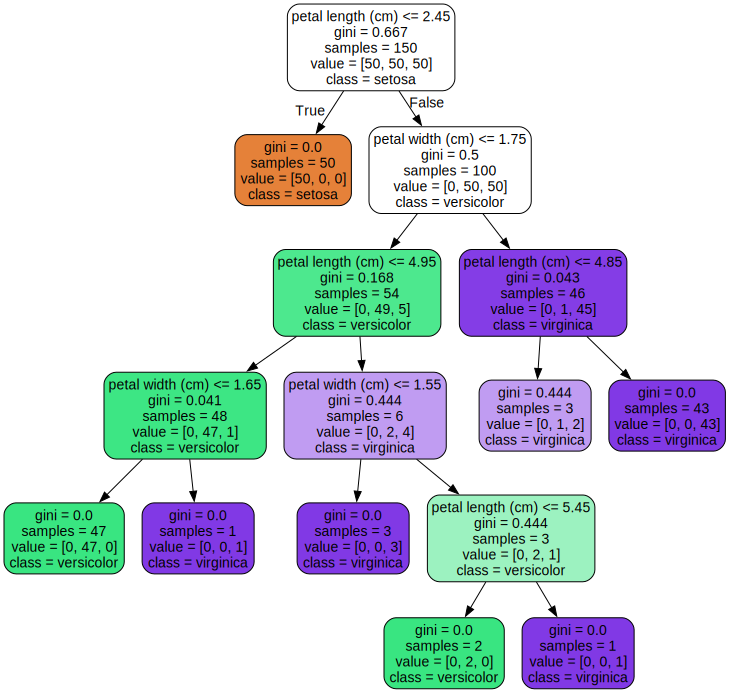

In [12]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

## Visualizar la frontera de decisión

In [13]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\PcVIP\Desktop\CursosUdemy\CompleteMachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


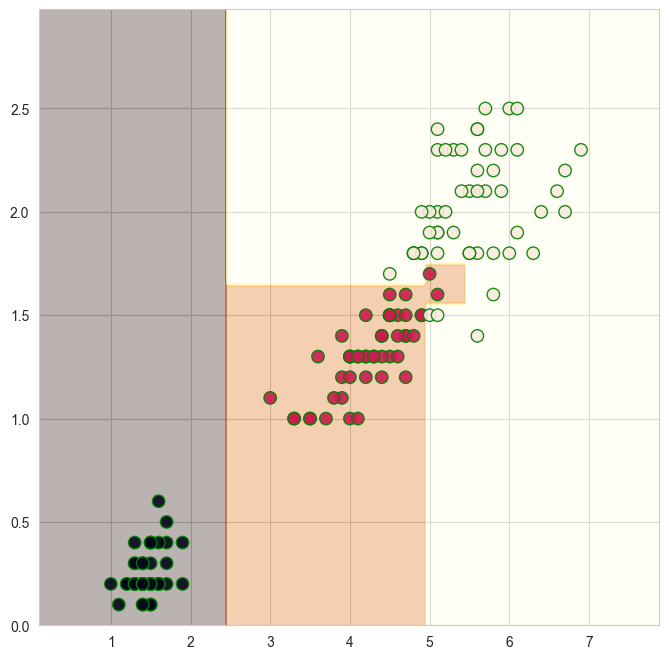

In [14]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
Xv = X.values.reshape(-1,1)
h = 0.02

x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g')

plt.show()

---
## 🌳 Aprendizaje de Árboles de Decisión  

### Principales Algoritmos

- **ID3 (Iterative Dichotomiser 3)**  
  Desarrollado en 1986 por **Ross Quinlan**.  
  El algoritmo crea un árbol de múltiples ramas, encontrando para cada nodo (de manera *greedy*) la característica categórica que produce la mayor **ganancia de información** para los objetivos categóricos.  
  Los árboles crecen hasta su tamaño máximo y luego se aplica una **poda** para mejorar su capacidad de generalización ante datos no vistos.

- **C4.5 (Sucesor de ID3)**  
  Elimina la restricción de que las características deben ser categóricas, permitiendo atributos continuos mediante la creación de divisiones dinámicas en intervalos discretos.  
  Convierte los árboles entrenados en conjuntos de reglas *if-then*, las evalúa según su precisión y realiza poda eliminando condiciones que no aportan mejora.  

- **C5.0**  
  Versión más reciente de Quinlan (bajo licencia propietaria).  
  Utiliza menos memoria, construye conjuntos de reglas más pequeños y logra mayor precisión que C4.5.

- **CART (Classification and Regression Trees)**  
  Similar a C4.5, pero admite **variables objetivo numéricas (regresión)** y no genera reglas.  
  Construye árboles binarios utilizando la característica y el umbral que maximizan la **ganancia de información** en cada nodo.

- **CHAID (Chi-squared Automatic Interaction Detector)**  
  Desarrollado por **Gordon Kass**.  
  Realiza divisiones de varios niveles al construir árboles de clasificación.  
  Es **no paramétrico** y no requiere que los datos sigan una distribución normal.  

> En **scikit-learn** se utiliza una versión optimizada del algoritmo **CART**.

---

### ⚖️ Impureza de Gini (Gini Impurity)

> *Valor predeterminado en scikit-learn.*

La **impureza de Gini** mide la pureza o variabilidad de los datos categóricos.

💡 **Diferencia entre Impureza de Gini y Coeficiente de Gini**:
- No son equivalentes ni similares.
- La impureza de Gini mide la **probabilidad de clasificación incorrecta** (usada en árboles de decisión multiclase).  
- El coeficiente de Gini se aplica a **clasificación binaria** y requiere una forma de **ordenar los ejemplos** según la probabilidad de pertenecer a la clase positiva.

📘 **Desarrollado por Corrado Gini en 1912.**

**Puntos Clave:**
- Un nodo **puro** (todas las muestras de una misma clase) tiene impureza de Gini = 0.  
- A medida que aumenta la **diversidad de clases**, el valor se aproxima a 1.  

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

donde \( p_i \) es la probabilidad (o frecuencia relativa) de cada clase.

---

### 🔥 Entropía

La entropía mide la cantidad de **incertidumbre o desorden** en el conjunto de datos.

$$
Entropy = - \sum_{i=1}^{C} p_i \log_b(p_i)
$$

donde:
- \( C \) = número de clases
- \( p_i \) = probabilidad de cada clase
- \( b \) = base del logaritmo (usualmente 2, e o 10)

---

### 🤔 ¿Cuál usar?

Según **Sebastian Raschka**:
- Ambos (Gini y Entropía) tienden a generar árboles muy similares.
- **Gini** suele ser **más rápido de calcular**, por lo que se usa como predeterminado.

---

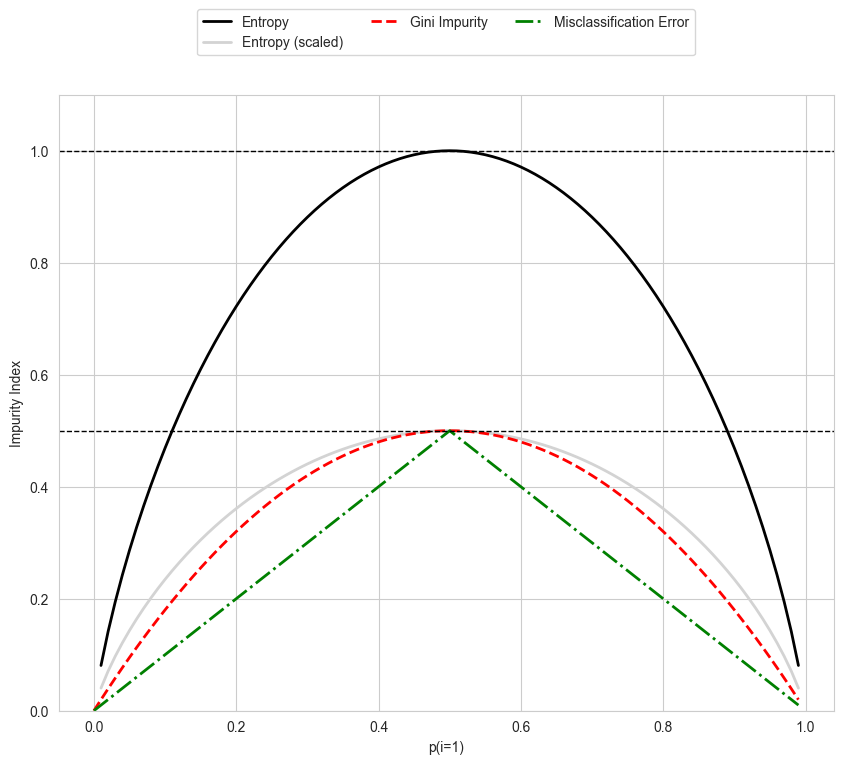

In [15]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                   ['Entropy', 'Entropy (scaled)', 
                   'Gini Impurity', 
                   'Misclassification Error'],
                   ['-', '-', '--', '-.'],
                   ['black', 'lightgray',
                      'red', 'green', 'cyan']):
     line = ax.plot(x, i, label=lab, 
                    linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### 📉 Ganancia de Información (Information Gain)

La **ganancia de información** mide la **reducción esperada de la entropía** al realizar una división en un nodo del árbol.

En otras palabras, indica **cuánto se mejora la pureza** de los datos al separar según una característica.

El proceso de aprendizaje del árbol continúa **dividiendo los nodos** mientras se logra una **reducción significativa en la entropía**, es decir, hasta obtener nodos con clases lo más **homogéneas** posible.

$$
\text{Ganancia de Información} = Entropía(\text{padre}) - 
\sum_{i=1}^{k} \frac{N_i}{N} \cdot Entropía(\text{hijo}_i)
$$

donde:
- \( N_i \) es el número de muestras en el nodo hijo \( i \),
- \( N \) es el número total de muestras en el nodo padre,
- y \( k \) es el número de divisiones.

💡 En resumen:  
Cuanto **mayor sea la ganancia de información**, **mejor es la división** para el árbol.


## Regresion

In [16]:
from sklearn import tree

X = [[0, 0], [3,3]]
y = [0.75, 3]

tree_reg = tree.DecisionTreeRegressor(random_state=42)
tree_reg = tree_reg.fit(X, y)
tree_reg.predict([[1.5, 1.5]])

array([0.75])

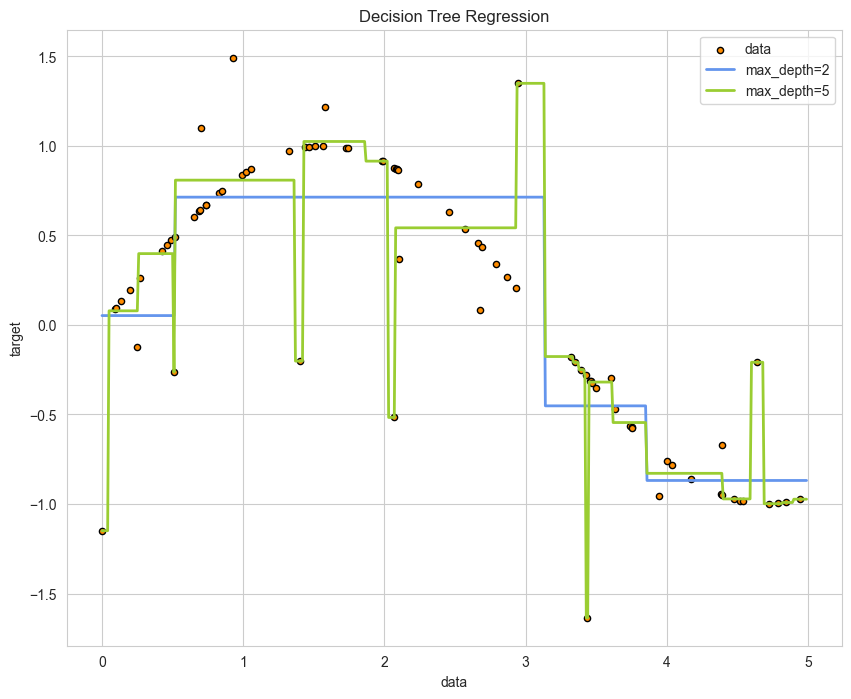

In [17]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

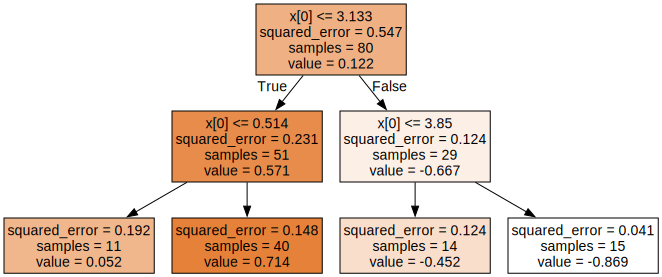

In [18]:
# Árbol 1
dot_data = tree.export_graphviz(regr_1, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph


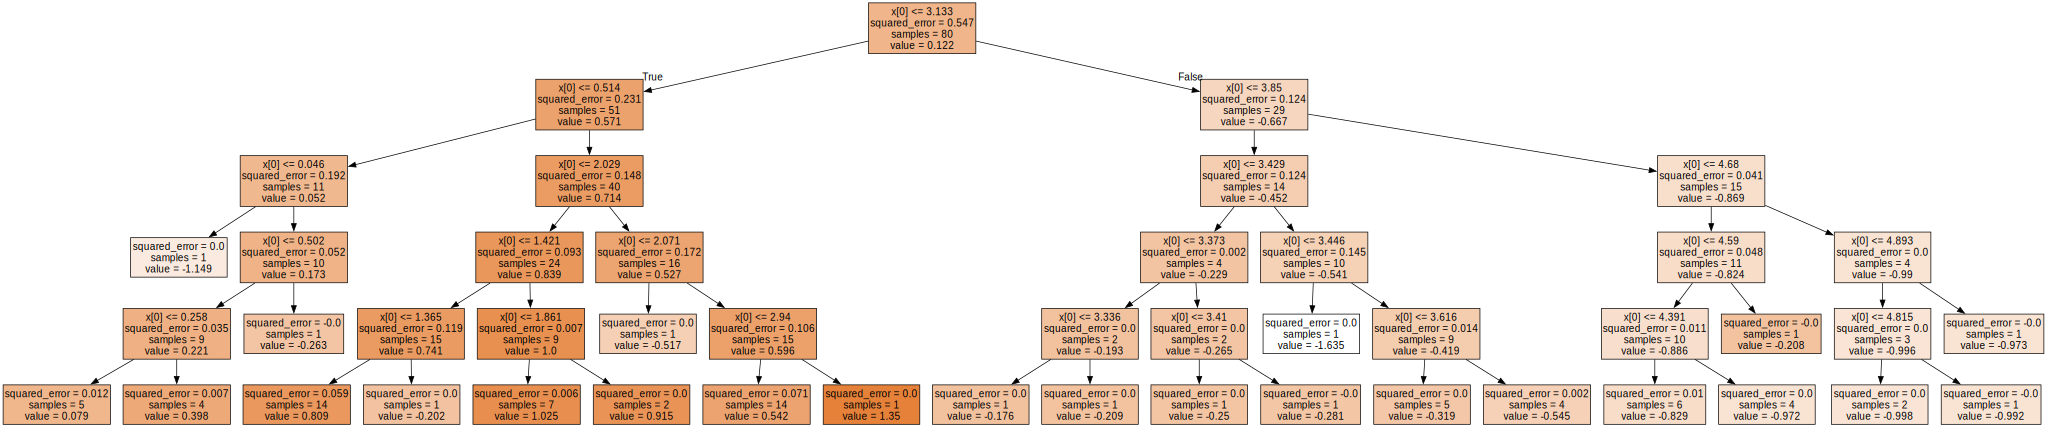

In [19]:
# Árbol 2
dot_data = tree.export_graphviz(regr_2, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph


---

## Regularizacion

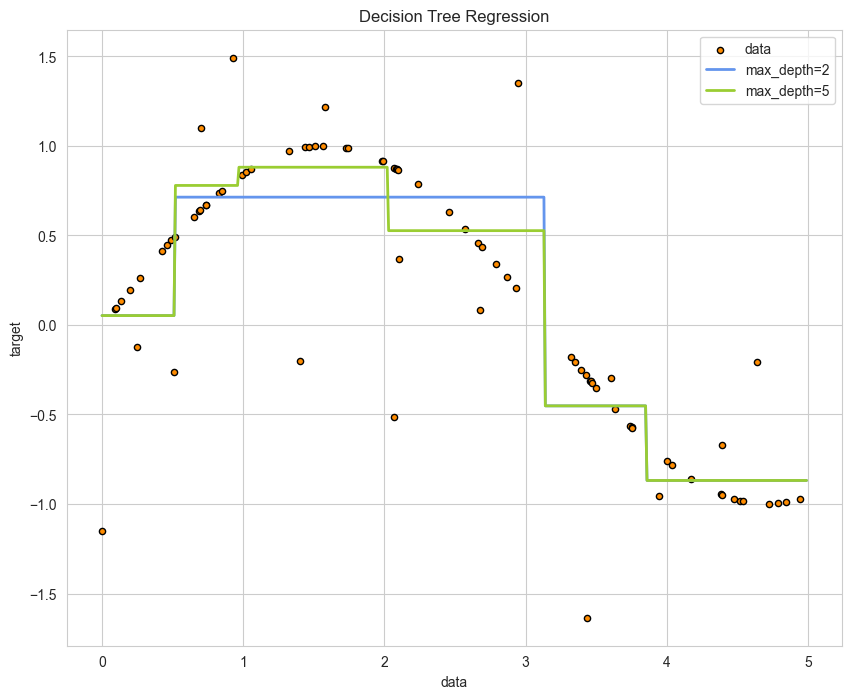

In [20]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

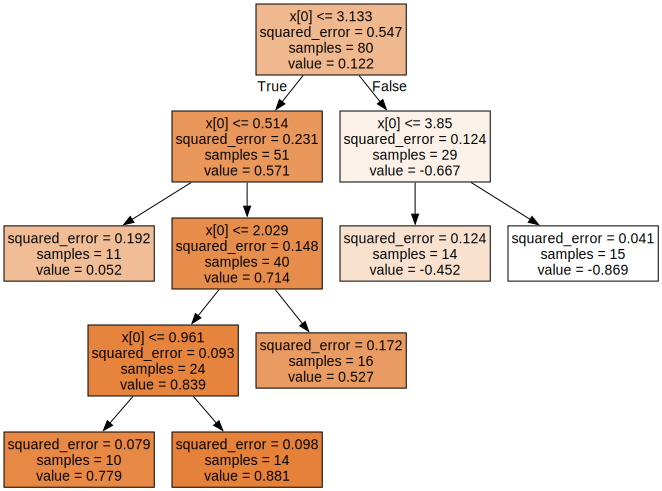

In [21]:
dot_data = tree.export_graphviz(regr_2, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph

---

## ⚠️ Sobreajuste (Overfitting)

El **sobreajuste** ocurre cuando un modelo aprende **demasiado bien los datos de entrenamiento**, capturando también el **ruido o las particularidades irrelevantes** de esos datos.  
Como resultado, el modelo muestra un **alto rendimiento en el conjunto de entrenamiento**, pero **bajo rendimiento en datos nuevos o de prueba**.

En el caso de los **árboles de decisión**, el sobreajuste aparece cuando el árbol:
- Crece **demasiado profundo**.
- Crea **muchas divisiones pequeñas**.
- Intenta clasificar perfectamente los datos de entrenamiento.

Esto hace que el árbol pierda capacidad de **generalización**.

### 🌿 Soluciones comunes para evitar el sobreajuste
- **Poda (Pruning):** eliminar ramas que aportan poca ganancia de información.  
- **Limitar la profundidad del árbol:** establecer `max_depth`.  
- **Restringir muestras mínimas por hoja o por división:** usar `min_samples_leaf` o `min_samples_split`.  
- **Usar métodos de conjunto (Ensemble):** como *Random Forest* o *Gradient Boosting*, que combinan múltiples árboles para reducir la varianza.

En resumen, un árbol más simple suele **generalizar mejor**, incluso si comete algunos errores en el entrenamiento.


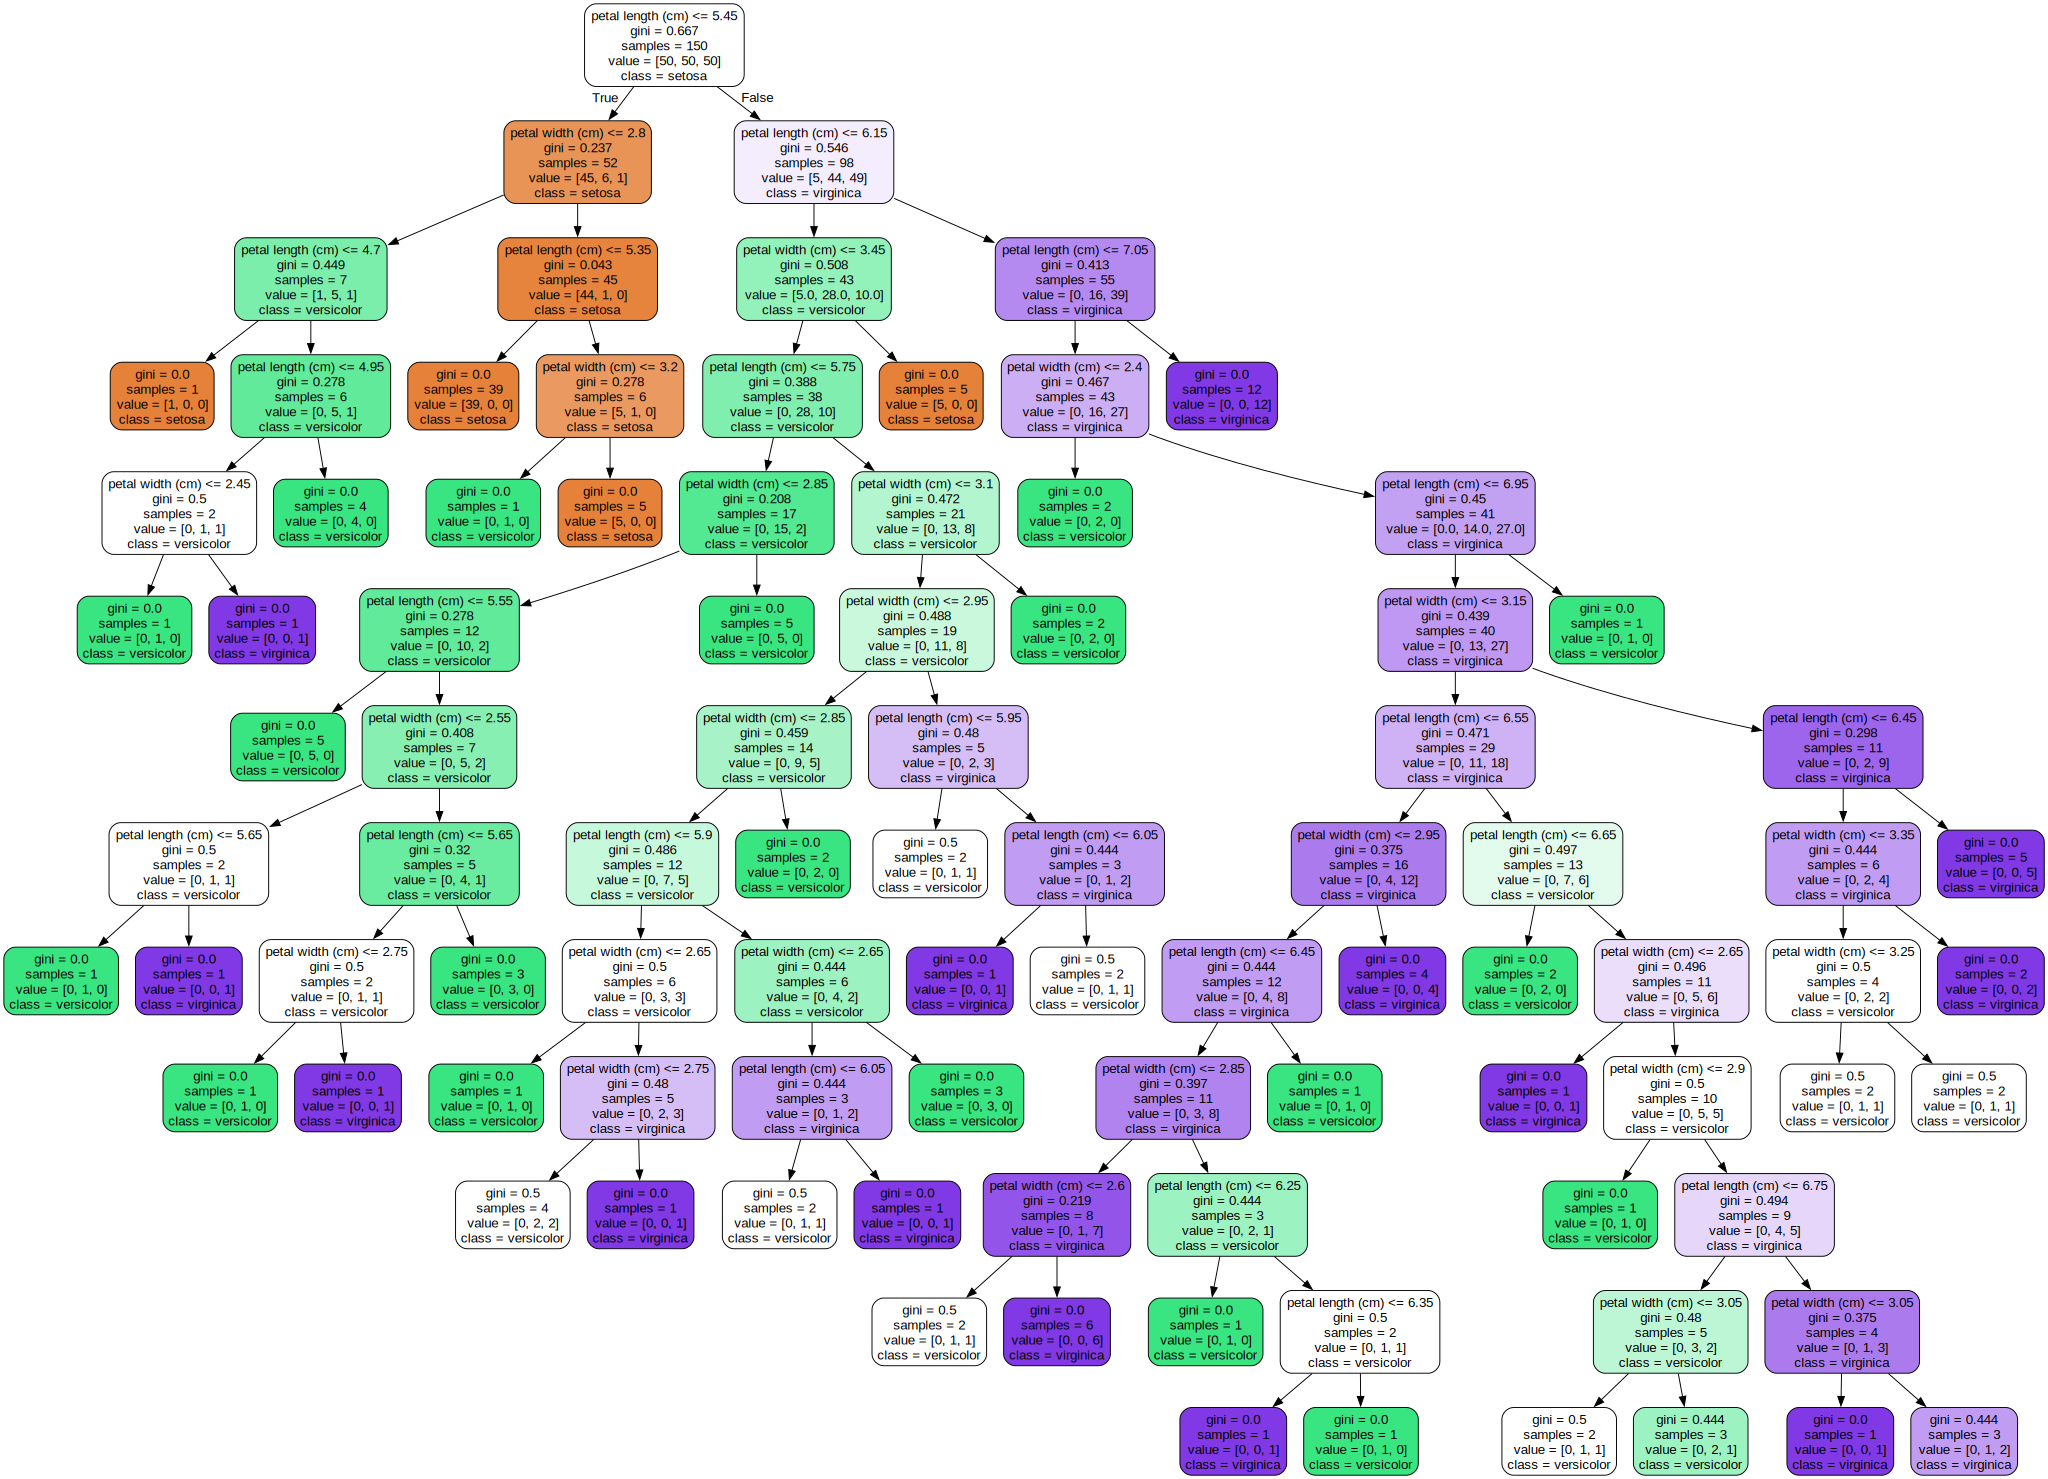

In [22]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

graph = graphviz.Source(dot_data)
graph

---

## 🧩 Modelado de Principio a Fin con Árboles de Decisión

El proceso de modelado completo con **Árboles de Decisión** implica seguir una serie de pasos que van desde la preparación de los datos hasta la evaluación del modelo final.  


In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_data, y_data = make_moons(n_samples=1000, noise=0.5, random_state=42)

cl1 = tree.DecisionTreeClassifier(random_state=42)
cl2 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

#params = {'max_leaf_nodes': list(range(2, 50)),
#          'min_samples_split': [2, 3, 4],
#          'min_samples_leaf': list(range(5, 20))}

params ={'min_samples_leaf': list(range(5, 20))}

grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'min_samples_leaf': [5, 6, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [24]:
grid_search_cv.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,16
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.83

In [28]:
cl1.fit(X_train, y_train)
y_pred = cl1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [29]:
cl1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

---

## 🚀 Próximos Pasos: Consejos Prácticos

Al trabajar con **Árboles de Decisión**, es importante aplicar algunas buenas prácticas para obtener modelos más robustos y evitar el sobreajuste.

### 🧠 Consejos para el uso práctico

- **Cuidado con el sobreajuste:**  
  Los árboles de decisión tienden a sobreajustarse cuando el conjunto de datos tiene **muchas características** en comparación con la cantidad de muestras.  
  🔍 Revisa siempre la proporción entre el número de muestras y el número de variables.

- **Reducción de dimensionalidad:**  
  Considera aplicar técnicas como **PCA**, **ICA** o **selección de características** antes del entrenamiento, para eliminar redundancias y mejorar el rendimiento.

- **Visualización del árbol:**  
  Utiliza la función `export_graphviz` para visualizar el árbol durante el entrenamiento.  
  Comienza probando con una **profundidad inicial pequeña**, por ejemplo `max_depth = 3`, para entender cómo el modelo toma decisiones.

- **Controlar la profundidad:**  
  Usa el parámetro `max_depth` para limitar el tamaño del árbol y **prevenir el sobreajuste**.

- **Ajustar el número mínimo de muestras:**  
  Configura `min_samples_split` o `min_samples_leaf` para establecer la cantidad mínima de muestras necesarias antes de realizar una división o crear una hoja.  
  Esto ayuda a suavizar el modelo y reducir la complejidad.

- **Balancear el conjunto de datos:**  
  Si una clase domina el conjunto, el árbol puede volverse **sesgado** hacia ella.  
  Para evitarlo, puedes:
  - Tomar una **muestra equilibrada** de cada clase.  
  - O **normalizar los pesos de las muestras** (`sample_weight`) para que la suma de los pesos por clase sea igual.

---

💡 **En resumen:**  
Un buen modelo de árbol de decisión no solo busca precisión, sino también **generalización y estabilidad**.  
Controlar la profundidad, balancear los datos y reducir la dimensionalidad son pasos clave para lograrlo.
